# Analysis of Salary of "Data Engineer" and "Software Engineer'' 

### Introduction
In a world abundant with diverse career options, individuals often prioritize salary as a pivotal factor when selecting their professional paths. Recognizing the significance of understanding the factors that exert influence on salaries, we embarked on a project aimed at deciphering patterns within a dataset obtained from Kaggle, encompassing salaries across various job titles. Employing Python and a four-step analytical process, we honed in on the specific theme of data engineers and software engineers because these two titles have similar job descriptions. This focused approach not only streamlined the analysis but also rendered results that are particularly relevant to those keen on understanding the salary dynamics within this professional domain.

We will be mainly using [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/) and [matplotlib](https://matplotlib.org/) to work with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sqlite3

We will use Kaggle API to import the data. Then, we will load the data to create Pandas Dataframe by using the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) in this step.

In [2]:
ori_df = pd.read_csv('Salary.csv')

In [3]:
display(ori_df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0


### Step 1: Data Cleaning
For subsequent analysis, we first need to cleanup this data to ensure it does not contain any unreasonable, missing, or duplicate values. We will begin by doing the following steps.

1. Dealing with missing data, such as NANs, by using [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

2. Dealing with duplicate data by using [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

3. Deleting "Gender", "Senior" and "Race" columns and selecting "data engineer" and "software engineer" as we narrowed down our topic.

4. Checking inconsistent and unreasonable data, such as data that "Years of Experience" > "Age" and "Salary" < 0.

In [4]:
df = ori_df.copy()
df.dropna(axis = 0, inplace = True)
df.drop_duplicates(inplace = True)
df.drop(columns = ['Gender', 'Senior', 'Race'], inplace = True)
display(df)

,Age,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,1,Software Engineer,5.0,90000.0,UK
1,28.0,2,Data Analyst,3.0,65000.0,USA
2,45.0,3,Manager,15.0,150000.0,Canada
3,36.0,1,Sales Associate,7.0,60000.0,USA
4,52.0,2,Director,20.0,200000.0,USA
...,...,...,...,...,...,...
6678,37.0,1,Sales Representative,6.0,75000.0,Canada
6679,49.0,3,Director of Marketing,20.0,200000.0,UK
6680,32.0,0,Sales Associate,3.0,50000.0,Australia
6681,30.0,1,Financial Manager,4.0,55000.0,China


In [5]:
countries = df['Country'].unique()
job_titles = ['Data Engineer', 'Software Engineer']
df = df[df['Job Title'].isin(job_titles)]

In [6]:
inconsistent_data = df[df['Years of Experience'] > df['Age']]
df.drop(inconsistent_data.index, inplace = True)

In [7]:
negative_salary = df[df['Salary'] < 0]
df.drop(negative_salary.index, inplace = True)
display(df)

,Age,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,1,Software Engineer,5.0,90000.0,UK
77,32.0,2,Software Engineer,6.0,100000.0,USA
159,28.0,1,Software Engineer,2.0,40000.0,Australia
169,34.0,2,Software Engineer,9.0,105000.0,China
213,44.0,1,Software Engineer,14.0,130000.0,China
...,...,...,...,...,...,...
5993,33.0,2,Software Engineer,8.0,120000.0,UK
5997,28.0,1,Software Engineer,3.0,70000.0,UK
6003,28.0,1,Software Engineer,3.0,70000.0,Canada
6114,26.0,2,Software Engineer,2.0,75000.0,China


### Step 2: Statistical Analysis
The term "data engineers" and "software engineers" will be collectively referred to as "engineers" in the following analysis.

Based on the outcomes of Step 2, the DataFrame named "df" represents a dataset of data engineers and software engineers in the USA, Canada, China, Australia, and the UK.

Our goal is to investigate the relationships among different attributes of engineers (data engineers and software engineers) in these five countries through the analysis of df. Consequently, we will create various statistical summaries using numpy's and pandas' functions, including max, min, std, sum, and more. In addition, we will group the data by age, years of experience, education level and country using [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) to explore the relationships between each attribute and salary.

#### Age:

In [8]:
ages = np.array(df['Age'])
ages_USA = np.array(df[df.Country == 'USA']['Age'])
ages_Canada = np.array(df[df.Country == 'Canada']['Age'])
ages_China = np.array(df[df.Country == 'China']['Age'])
ages_Australia = np.array(df[df.Country == 'Australia']['Age'])
ages_UK = np.array(df[df.Country == 'UK']['Age'])

ages_df = pd.DataFrame([[ages_USA.max(), ages_USA.min(), ages_USA.ptp(), ages_USA.std(), ages_USA.mean(), np.sum(ages_USA<=ages_USA.mean()), np.sum(ages_USA>ages_USA.mean())],
                        [ages_Canada.max(), ages_Canada.min(), ages_Canada.ptp(), ages_Canada.std(), ages_Canada.mean(), np.sum(ages_Canada<=ages_Canada.mean()), np.sum(ages_Canada>ages_Canada.mean())],
                        [ages_China.max(), ages_China.min(), ages_China.ptp(), ages_China.std(), ages_China.mean(), np.sum(ages_China<=ages_China.mean()), np.sum(ages_China>ages_China.mean())],
                        [ages_Australia.max(), ages_Australia.min(), ages_Australia.ptp(), ages_Australia.std(), ages_Australia.mean(), np.sum(ages_Australia<=ages_Australia.mean()), np.sum(ages_Australia>ages_Australia.mean())],
                        [ages_UK.max(), ages_UK.min(), ages_UK.ptp(), ages_UK.std(), ages_UK.mean(), np.sum(ages_UK<=ages_UK.mean()), np.sum(ages_UK>ages_UK.mean())],
                        [ages.max(), ages.min(), ages.ptp(), ages.std(),ages.mean(), np.sum(ages<=ages.mean()), np.sum(ages>ages.mean())]],
                       columns = ['Max', 'Min', 'Range', 'Standard deviation', 'Ave', '# <= Ave', '# > Ave'], \
                       index = ['USA', 'Canada', 'China', 'Australia', 'UK', 'Total'])

display(ages_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,58.0,23.0,35.0,6.952511,32.403226,86,38
Canada,54.0,23.0,31.0,7.451569,33.109244,79,40
China,58.0,22.0,36.0,7.950737,33.473684,71,43
Australia,52.0,23.0,29.0,6.561298,31.906780,72,46
UK,54.0,23.0,31.0,6.725052,32.243697,79,40
Total,58.0,22.0,36.0,7.161440,32.619529,393,201


The table above reveals that China has the oldest engineers, as evidenced by the maximum age of 58 years old. On the other hand, the minimum age is quite similar across these five countries (aorund 22 and 23 years old). Therefore, the age distribution range and the average age of engineers in China are the largest among these five countries.

#### Years of Experience:

In [9]:
years = np.array(df['Years of Experience'])
years_USA = np.array(df[df.Country == 'USA']['Years of Experience'])
years_Canada = np.array(df[df.Country == 'Canada']['Years of Experience'])
years_China = np.array(df[df.Country == 'China']['Years of Experience'])
years_Australia = np.array(df[df.Country == 'Australia']['Years of Experience'])
years_UK = np.array(df[df.Country == 'UK']['Years of Experience'])

years_df = pd.DataFrame([[years_USA.max(), years_USA.min(), years_USA.ptp(), years_USA.std(), years_USA.mean(), np.sum(years_USA<=years_USA.mean()), np.sum(years_USA>years_USA.mean())],
                        [years_Canada.max(), years_Canada.min(), years_Canada.ptp(), years_Canada.std(), years_Canada.mean(), np.sum(years_Canada<=years_Canada.mean()), np.sum(years_Canada>years_Canada.mean())],
                        [years_China.max(), years_China.min(), years_China.ptp(), years_China.std(), years_China.mean(), np.sum(years_China<=years_China.mean()), np.sum(years_China>years_China.mean())],
                        [years_Australia.max(), years_Australia.min(), years_Australia.ptp(), years_Australia.std(), years_Australia.mean(), np.sum(years_Australia<=years_Australia.mean()), np.sum(years_Australia>years_Australia.mean())],
                        [years_UK.max(), years_UK.min(), years_UK.ptp(), years_UK.std(), years_UK.mean(), np.sum(years_UK<=years_UK.mean()), np.sum(years_UK>years_UK.mean())],
                        [years.max(), years.min(), years.ptp(), years.std(), years.mean(), np.sum(years<=years.mean()), np.sum(years>years.mean())]],
                       columns=['Max', 'Min', 'Range', 'Standard deviation', 'Ave', '# <= Ave', '# > Ave'], \
                       index=['USA', 'Canada', 'China', 'Australia', 'UK', 'Total'])

display(years_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,27.0,1.0,26.0,6.351742,7.814516,76,48
Canada,32.0,1.0,31.0,6.846589,8.327731,79,40
China,32.0,1.0,31.0,6.971759,8.385965,73,41
Australia,28.0,1.0,27.0,5.887605,7.118644,76,42
UK,32.0,1.0,31.0,6.483617,7.747899,72,47
Total,32.0,1.0,31.0,6.531300,7.875421,359,235


The table above indicates that engineers in these five countries all have at least one year of work experience. The average years of work experience range from seven to eight years. 

#### Education Level:

In [10]:
edu = np.array(df['Education Level'])
edu_USA = np.array(df[df.Country == 'USA']['Education Level'])
edu_Canada = np.array(df[df.Country == 'Canada']['Education Level'])
edu_China = np.array(df[df.Country == 'China']['Education Level'])
edu_Australia = np.array(df[df.Country == 'Australia']['Education Level'])
edu_UK = np.array(df[df.Country == 'UK']['Education Level'])

edu_df = pd.DataFrame([[edu_USA.max(), edu_USA.min(), edu_USA.ptp(), edu_USA.std(), edu_USA.mean(), np.sum(edu_USA<=edu_USA.mean()), np.sum(edu_USA>edu_USA.mean())],
                        [edu_Canada.max(), edu_Canada.min(), edu_Canada.ptp(), edu_Canada.std(), edu_Canada.mean(), np.sum(edu_Canada<=edu_Canada.mean()), np.sum(edu_Canada>edu_Canada.mean())],
                        [edu_China.max(), edu_China.min(), edu_China.ptp(), edu_China.std(), edu_China.mean(), np.sum(edu_China<=edu_China.mean()), np.sum(edu_China>edu_China.mean())],
                        [edu_Australia.max(), edu_Australia.min(), edu_Australia.ptp(), edu_Australia.std(), edu_Australia.mean(), np.sum(edu_Australia<=edu_Australia.mean()), np.sum(edu_Australia>edu_Australia.mean())],
                        [edu_UK.max(), edu_UK.min(), edu_UK.ptp(), edu_UK.std(), edu_UK.mean(), np.sum(edu_UK<=edu_UK.mean()), np.sum(edu_UK>edu_UK.mean())],
                        [edu.max(), edu.min(),edu.ptp(), edu.std(), edu.mean(), np.sum(edu<=edu.mean()), np.sum(edu>edu.mean())]],
                       columns=['Max', 'Min', 'Range', 'Standard deviation', 'Ave', '# <= Ave', '# > Ave'], \
                       index=['USA', 'Canada', 'China', 'Australia', 'UK', 'Total'])

display(edu_df)

,Max,Min,Range,Standard deviation,Ave,# <= Ave,# > Ave
USA,3,1,2,0.580869,1.403226,80,44
Canada,3,1,2,0.576718,1.462185,69,50
China,3,1,2,0.638606,1.491228,67,47
Australia,3,0,3,0.605977,1.364407,79,39
UK,3,1,2,0.557543,1.420168,73,46
Total,3,0,3,0.593720,1.427609,368,226


From the table above, it can be observed that only engineers in Australia have individuals with an education level of zero, signifying high school graduates. In contrast, engineers in the other countries have a minimum education level of one, indicating at least a university degree. 

The education levels are categorized as follows: level 0 represents high school graduation, level 1 represents university graduation, level 2 represents postgraduate studies, and level 3 represents doctoral graduation.

#### Salary:

In [11]:
# Average Salary by Age
age_salary_df = pd.DataFrame(df.groupby(by='Age')['Salary'].mean().round(2))
display(age_salary_df)

,Salary
Age,
22.0,50000.00
23.0,52631.58
24.0,57500.00
25.0,58600.00
26.0,52360.00
27.0,96705.26
28.0,125344.42
29.0,102811.00
30.0,101223.20


In [12]:
age_salary_df.loc[age_salary_df.idxmax(), 'Salary']

Age
54.0    193175.4
Name: Salary, dtype: float64

We will analyze the data from five countries as a whole, calculating the average salary for different age groups. From the results, we can observe that the highest salary occurs at the age of 54, and there is a trend of increasing salaries with age. Subsequently, we will use figures to present this more clearly.

In [13]:
# Average Salary by Years of Experience
year_salary_df = pd.DataFrame(df.groupby(by='Years of Experience')['Salary'].mean().round(2))
display(year_salary_df)

,Salary
Years of Experience,
1.0,52214.29
2.0,57297.30
3.0,79056.60
4.0,104648.94
5.0,126252.35
6.0,137839.96
7.0,119047.97
8.0,160092.68
9.0,147291.67


In [14]:
year_salary_df.loc[year_salary_df.idxmax(), 'Salary']

Years of Experience
32.0    195270.0
Name: Salary, dtype: float64

Similarly, we will calculate the average salary for different years of work experience. From the results, we can observe that the highest salary is found among engineers with 32 years of work experience, and there is a trend of increasing salaries with the number of years of work experience. Subsequently, we will use figures to present this more clearly as well.

In [15]:
# Average Salary by Education Level
edu_salary_df = pd.DataFrame(df.groupby(by='Education Level')['Salary'].mean().round(2))
display(edu_salary_df)

,Salary
Education Level,
0,165919.00
1,107661.75
2,143183.48
3,166154.60


In [16]:
edu_salary_df.loc[edu_salary_df.idxmax(), 'Salary']

Education Level
3    166154.6
Name: Salary, dtype: float64

Next, we calculate the average salary for different education levels. From the results, we can observe that the highest salary is found among engineers with education level three. However, the salary for level zero is not necessarily the lowest, suggesting that there may not be a strictly positive correlation between education level and salary. Subsequently, we will use figures to present this more clearly.

In [17]:
# Average Salary in Different Countries (Sorted in Descending Order)
country_salary_df = pd.DataFrame(df.groupby(by='Country')['Salary'].mean().round(2).sort_values(ascending = False))
display(country_salary_df)

,Salary
Country,
Canada,126978.40
China,123874.48
USA,123646.65
UK,119898.61
Australia,118240.69


Finally, when examining the average salary of engineers in each country, we can observe that Canada has the highest average engineer salary, while Australia has the lowest, with a difference of approximately ten thousand US dollars.

### Step 3: Visualization
This project aims to gain a deeper understanding of the engineer profession in different countries, specifically focusing on salary, age, years of work experience, and education levels. To identify any distinct distribution trends and explore potential relationships among these factors, we will generate several figures as follows.

####  Age:
Starting with Age, we will do visualizations using box plots and histograms to observe the age distribution of engineers across the five countries. We will begin by doing the following steps.

1. Drawing box plots and observe the distribution of engineers' ages in different countries by using matplotlib's [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

2. Drawing histograms by using matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), and combining them with [seaborn](https://seaborn.pydata.org/tutorial/introduction.html)'s [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to overlay the histogram and KDE on the same plot. This helps to observe the distribution of engineers' ages across different countries.

3. Drawing a scatter plot by using matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), then fitting a straight line expressing the relationship between age and salary by using [scikit-learn](https://scikit-learn.org/stable/)'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

4. Calculating the correlation coefficient between the two variables by using the [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), indicating whether there is a correlation between them.

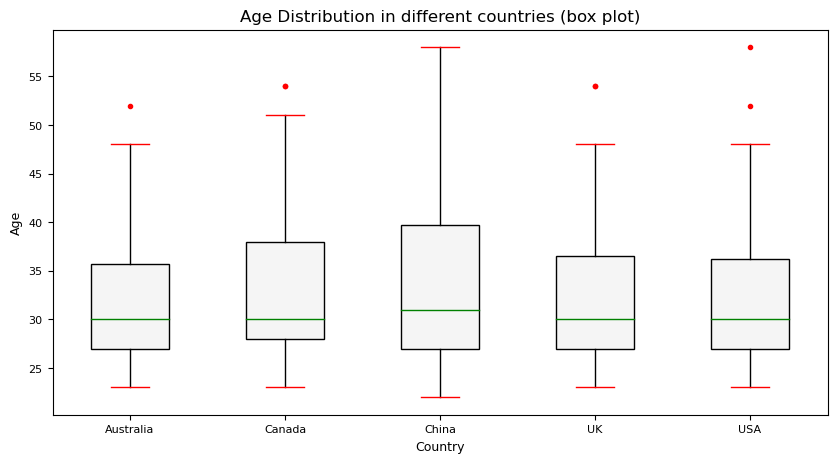

In [18]:
data_0 = [ages_Australia, ages_Canada, ages_China, ages_UK, ages_USA]
Country_name = ['Australia', 'Canada', 'China', 'UK', 'USA']

fig0 = plt.figure(figsize = (10,5))
ax0 = fig0.add_subplot(1,1,1)

ax0.boxplot(data_0, labels = Country_name,
            patch_artist = True,
            boxprops = dict(facecolor = 'whitesmoke'),
            capprops = dict(color = 'red'),
            medianprops = dict(color = 'green'),
            flierprops = dict(marker = '.', markerfacecolor = 'red', markeredgecolor = 'red'))
ax0.set_title('Age Distribution in different countries (box plot)', fontsize = 12)
ax0.set_xlabel('Country', fontsize = 9)
ax0.set_ylabel('Age', fontsize = 9)
ax0.tick_params(axis = 'both', labelsize = 8)

From the above box plot, it can be observed that only China has no outliers. Regardless of these outliers, China still has the oldest engineers, with exceeding 55 years old. If we exclude these outliers, the engineers with the maximum age in Canada rank second. Engineers from the other three countries have a similar maximum age, approximately 48 years old.

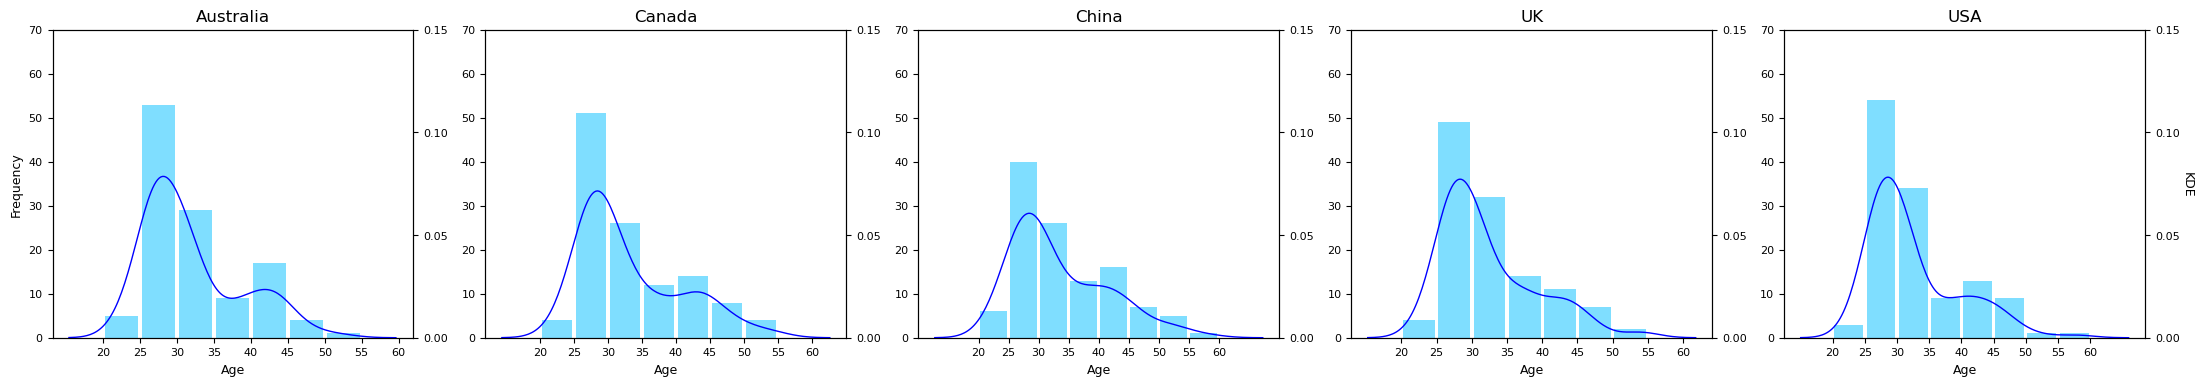

In [19]:
fig1, ax1 = plt.subplots(1, 5, figsize = (27,4))

for i in range(len(data_0)):
    ax = ax1[i]

    n, bins, patches = ax.hist(data_0[i], bins = 8,
                                 range = (20, 60),
                                alpha = 0.5,
                                color = 'deepskyblue',
                                rwidth = 0.9)

    ax.set_title(f'{Country_name[i]}', fontsize = 12)
    ax.set_xlabel('Age', fontsize = 9)
    if i == 0:
        ax.set_ylabel('Frequency', fontsize = 9)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.set_ylim(0, 70)
    ax.set_xticks(bins)

    axb = ax.twinx()

    sns.kdeplot(data_0[i], ax = axb, color = 'blue', linewidth = 1)

    axb.set_yticks([0, 0.05, 0.1, 0.15])
    if i == 4:
        axb.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
    else:
        axb.set_ylabel('')
    axb.tick_params(axis = 'both', labelsize = 8)

From the above histograms, they can be observed that the age distributions in these five countries are right-skewed, indicating a higher proportion of younger engineers. The highest number of engineers falls within the age range of 25 to 30 years.

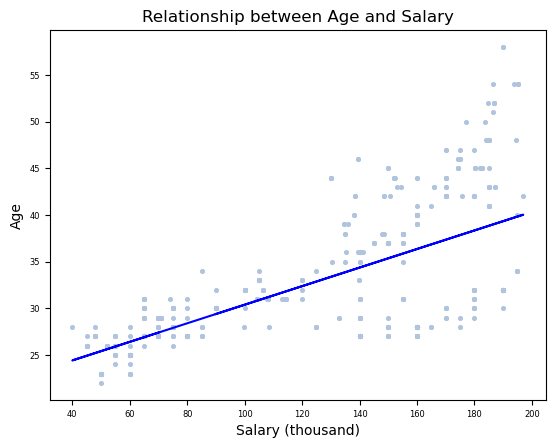

In [20]:
fig2, ax2 = plt.subplots()

y1 = np.array(df['Age'])
x1 = np.array(df['Salary']/1000)

ax2.scatter(x1, y1, color = 'lightsteelblue', s = 7)
ax2.set_xlabel('Salary (thousand)', fontsize = 10)
ax2.set_ylabel('Age', fontsize = 10)
ax2.tick_params(axis = 'both', labelsize = 6)
ax2.set_title('Relationship between Age and Salary')

model1 = LinearRegression()
model1.fit(np.array(x1).reshape(-1, 1), y1)
ax2.plot(x1, model1.predict(np.array(x1).reshape(-1, 1)), color = 'blue')

In [21]:
# correlation coefficient
df['Age'].corr(df['Salary'])

0.6705694858702578

The plot above illustrates the relationship between age and salary. The blue solid line represents the linear regression line, and their correlation coefficient is 0.67, falling within the range of 0.3 to 0.7. This suggests a moderate positive correlation between age and salary for the engineering profession.

#### Years of Experience:
Moving on to years of work experience, we will utilize box plots and histograms to visualize the distribution across the five countries as well. We will begin by doing the following steps.

1. Drawing box plots and observe the distribution of engineers' years of work experience in different countries by using matplotlib's [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

2. Drawing histograms by using matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), and combining them with [seaborn](https://seaborn.pydata.org/tutorial/introduction.html)'s [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to overlay the histogram and KDE on the same plot. This helps to observe the distribution of engineers' years of work experience across different countries.

3. Drawing a scatter plot by using matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), then fitting a straight line expressing the relationship between years of work experience and salary by using [scikit-learn](https://scikit-learn.org/stable/)'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

4. Calculating the correlation coefficient between the two variables by using the [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), indicating whether there is a correlation between them.

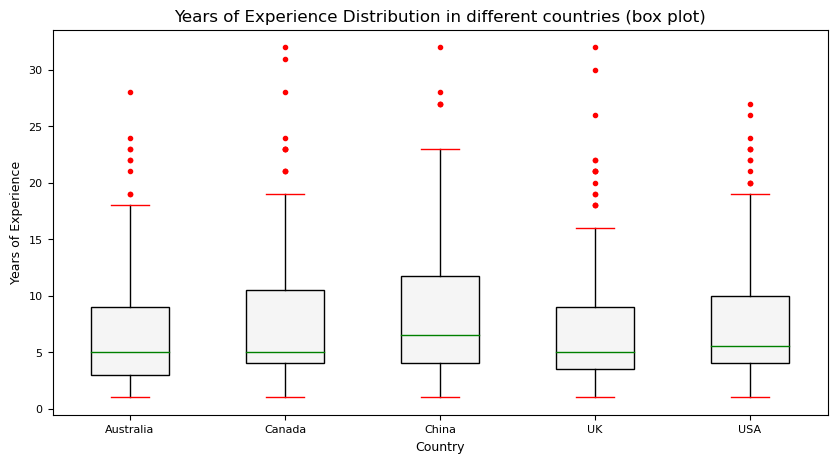

In [22]:
data_1 = [years_Australia, years_Canada, years_China, years_UK, years_USA]

fig3 = plt.figure(figsize = (10,5))
ax3 = fig3.add_subplot(1,1,1)

ax3.boxplot(data_1, labels = Country_name,
            patch_artist = True,
            boxprops = dict(facecolor = 'whitesmoke'),
            capprops = dict(color = 'red'),
            medianprops = dict(color = 'green'),
            flierprops = dict(marker = '.', markerfacecolor = 'red', markeredgecolor = 'red'))
ax3.set_title('Years of Experience Distribution in different countries (box plot)', fontsize = 12)
ax3.set_xlabel('Country', fontsize = 9)
ax3.set_ylabel('Years of Experience', fontsize = 9)
ax3.tick_params(axis = 'both', labelsize = 8)

From the box plot above, it can be observed that each country has some outliers. Excluding these outliers, engineers in China have the most years of work experience, exceeding 20 years. The second-highest countries are Canada and the USA, where engineers have a maximum work experience of 19 years.

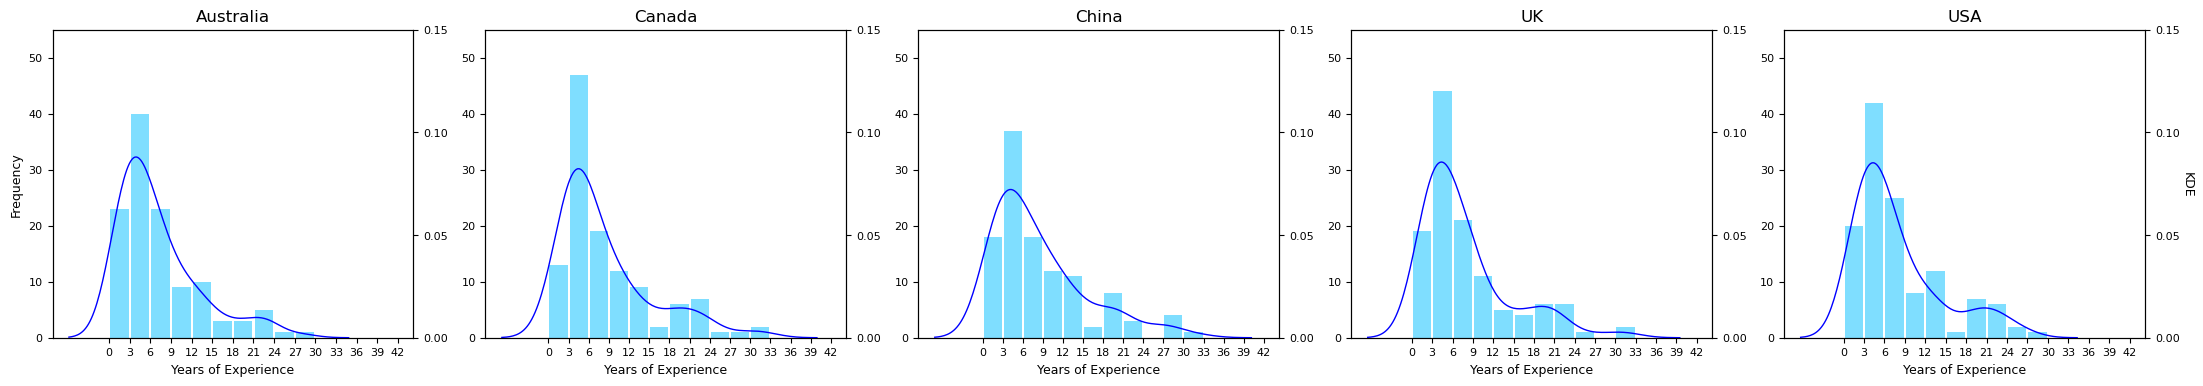

In [23]:
fig4, ax4 = plt.subplots(1, 5, figsize = (27,4))

for i in range(len(data_1)):
    ax = ax4[i]

    n, bins, patches = ax.hist(data_1[i], bins = 14,
                                 range = (0, 42),
                                alpha = 0.5,
                                color = 'deepskyblue',
                                rwidth = 0.9)

    ax.set_title(f'{Country_name[i]}', fontsize = 12)
    ax.set_xlabel('Years of Experience', fontsize = 9)
    if i == 0:
        ax.set_ylabel('Frequency', fontsize = 9)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.set_ylim(0, 55)
    ax.set_xticks(bins)

    axb = ax.twinx()

    sns.kdeplot(data_1[i], ax = axb, color = 'blue', linewidth = 1)

    axb.set_yticks([0, 0.05, 0.1, 0.15])
    if i == 4:
        axb.set_ylabel('KDE', fontsize = 9, rotation = 270, labelpad = 10)
    else:
        axb.set_ylabel('')
    axb.tick_params(axis = 'both', labelsize = 8)

From the above histograms, they can be observed that the years of work experience distributions in these five countries are right-skewed, indicating a higher proportion of relatively less experienced engineers. The highest number of engineers falls within the years of work experience range of 3 to 6 years.

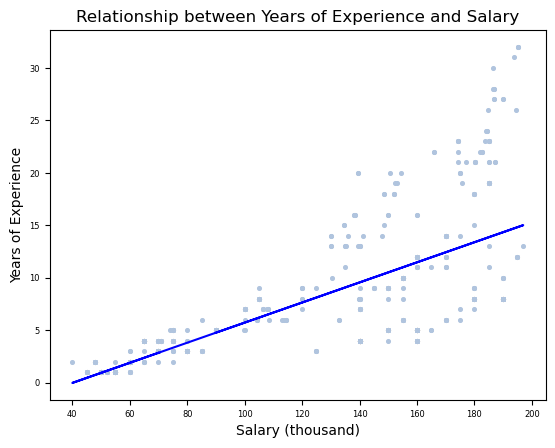

In [24]:
fig5, ax5 = plt.subplots()
y2 = np.array(df['Years of Experience'])
x2 = np.array(df['Salary']/1000)

ax5.scatter(x2, y2, color = 'lightsteelblue', s = 7)
ax5.set_xlabel('Salary (thousand)', fontsize = 10)
ax5.set_ylabel('Years of Experience', fontsize = 10)
ax5.tick_params(axis = 'both', labelsize = 6)
ax5.set_title('Relationship between Years of Experience and Salary')

model2 = LinearRegression()
model2.fit(np.array(x2).reshape(-1, 1), y2)
ax5.plot(x2, model2.predict(np.array(x2).reshape(-1, 1)), color = 'blue')

In [25]:
# correlation coefficient
df['Years of Experience'].corr(df['Salary'])

0.7080574507840073

The plot above illustrates the relationship between years of experience and salary. The blue solid line represents the linear regression line, and their correlation coefficient is 0.71, exceeding 0.7. This suggests a strong positive correlation between years of experience and salary for the engineering profession.

#### Education Level:
Finally, looking at education levels, we will calculate the ratio of each level for engineers in these five countries. Then we will draw pie charts by using matplotlib's [pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) to illustrate the distribution of engineers' education levels across the five countries.

In [26]:
edu_Australia2 = df[df.Country=='Australia'].groupby('Education Level').count()
temp = []
for i in range(len(edu_Australia2.index)):
    temp.append(edu_Australia2.iloc[i][1])
temp_sum = sum(temp)
edu_Australia_ratio = [x / temp_sum for x in temp]

edu_Canada2 = df[df.Country=='Canada'].groupby('Education Level').count()
temp = []
for i in range(len(edu_Canada2.index)):
    temp.append(edu_Canada2.iloc[i][1])
temp_sum = sum(temp)
edu_Canada_ratio = [x / temp_sum for x in temp]

edu_China2 = df[df.Country=='China'].groupby('Education Level').count()
temp = []
for i in range(len(edu_China2.index)):
    temp.append(edu_China2.iloc[i][1])
temp_sum = sum(temp)
edu_China_ratio = [x / temp_sum for x in temp]

edu_UK2 = df[df.Country=='UK'].groupby('Education Level').count()
temp = []
for i in range(len(edu_UK2.index)):
    temp.append(edu_UK2.iloc[i][1])
temp_sum = sum(temp)
edu_UK_ratio = [x / temp_sum for x in temp]

edu_USA2 = df[df.Country=='USA'].groupby('Education Level').count()
temp = []
for i in range(len(edu_USA2.index)):
    temp.append(edu_USA2.iloc[i][1])
temp_sum = sum(temp)
edu_USA_ratio = [x / temp_sum for x in temp]

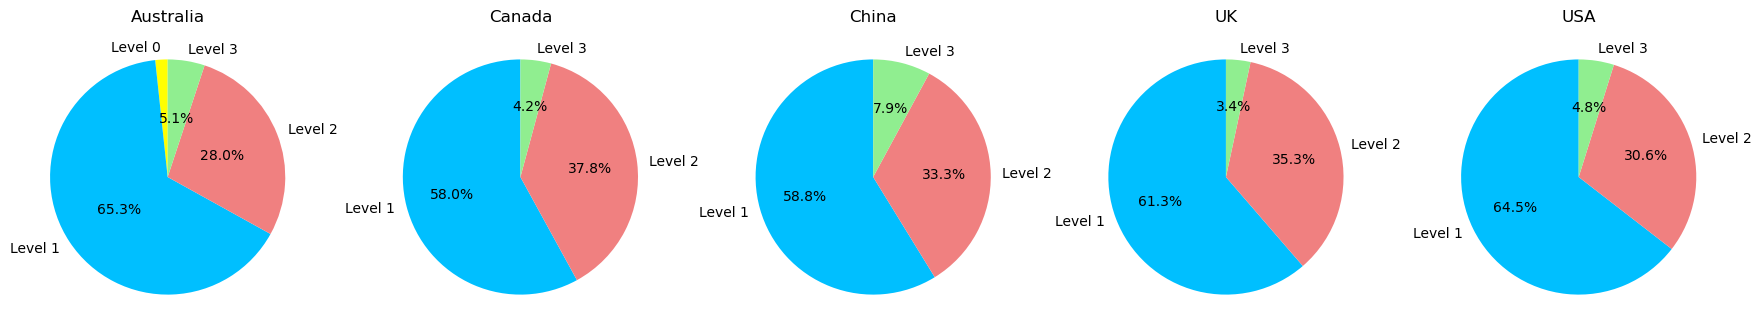

In [27]:
data_2 = [edu_Australia_ratio, edu_Canada_ratio, edu_China_ratio, edu_UK_ratio, edu_USA_ratio]

fig6, ax6 = plt.subplots(1, 5, figsize=(22, 4))

for i in range(len(data_2)):
    ax = ax6[i]
    if len(data_2[i]) == 4:
        ax.pie(data_2[i],
               labels = ['Level 0', 'Level 1', 'Level 2', 'Level 3'],
               autopct = lambda p: f'{p:.1f}%' if p > 2 else '',
               startangle = 90,
               pctdistance = 0.5,
               colors = ['yellow', 'deepskyblue', 'lightcoral', 'lightgreen'])

        ax.set_title(f'{Country_name[i]}', fontsize = 12)
    else:
        ax.pie(data_2[i],
               labels = ['Level 1', 'Level 2', 'Level 3'],
               autopct ='%1.1f%%',
               startangle = 90,
               colors = ['deepskyblue', 'lightcoral', 'lightgreen'])

        ax.set_title(f'{Country_name[i]}', fontsize = 12)

From the pie charts above, they can be observed that only Australia has engineers with education level 0. Engineers in other countries have at least education level 1. Additionally, among these five countries, engineers with education level 1 are the most numerous, followed by education level 2, then education level 3. Lastly, the number of engineers with education level 0 is the lowest.

The education levels are categorized as follows: level 0 represents high school graduation, level 1 represents university graduation, level 2 represents postgraduate studies, and level 3 represents doctoral graduation.

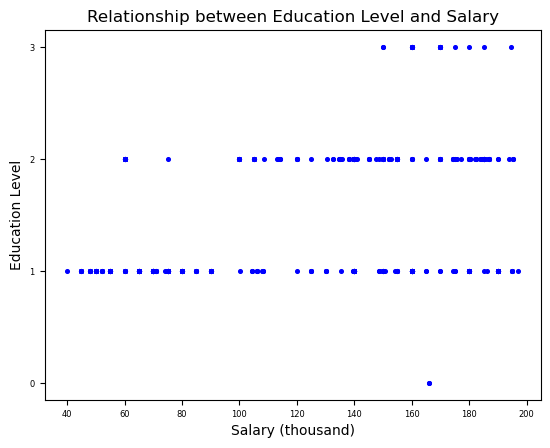

In [28]:
fig7, ax7 = plt.subplots()
y3 = np.array(df['Education Level'])
x3 = np.array(df['Salary']/1000)

ax7.scatter(x3, y3, color = 'blue', s = 7)
ax7.set_xlabel('Salary (thousand)', fontsize = 10)
ax7.set_ylabel('Education Level', fontsize = 10)
ax7.tick_params(axis = 'both', labelsize = 6)
ax7.set_title('Relationship between Education Level and Salary')
ax7.set_yticks([0, 1, 2, 3])

The plot indicates that engineers with higher education levels have higher minimum salaries. However, the maximum salary does not seem to vary based on the education level. This suggests that, overall, engineers with education levels 0 or 1 may still have higher salaries compared to engineers with education levels 2 or 3. In summary, there is no direct correlation between education level and salary for engineers.

In conclusion, based on our dataset, we believe that the most influential factor affecting engineers' salaries is work experience, followed by age, with education level being a lesser contributing factor.

### Step 4: Export the clean data to a database

We will interact with a SQLite database using the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library and pandas.

First, we will establish a connection to an SQLite database named 'Data of Engineers Salary.db'. Then, we will take our DataFrame (df) and write it to an SQLite table named 'df' in the connected database (conn). In the eand, we will read the content of this table back into a new DataFrame using a SQL SELECT query to check the entire content of the 'df' table.

In [29]:
conn = sqlite3.connect('Data of Engineers Salary.db')

In [30]:
df.to_sql('df', conn, index = False, if_exists = 'append')

594

In [31]:
pd.read_sql('select * from df',conn)

,Age,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,1,Software Engineer,5.0,90000.0,UK
1,32.0,2,Software Engineer,6.0,100000.0,USA
2,28.0,1,Software Engineer,2.0,40000.0,Australia
3,34.0,2,Software Engineer,9.0,105000.0,China
4,44.0,1,Software Engineer,14.0,130000.0,China
...,...,...,...,...,...,...
1183,33.0,2,Software Engineer,8.0,120000.0,UK
1184,28.0,1,Software Engineer,3.0,70000.0,UK
1185,28.0,1,Software Engineer,3.0,70000.0,Canada
1186,26.0,2,Software Engineer,2.0,75000.0,China
